In [158]:
# reference: https://www.kaggle.com/robikscube/m5-forecasting-starter-data-exploration/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
# import seaborn as sns
from itertools import cycle

In [19]:
IMG_FOLDER = "./img"

In [2]:

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
# Read in the data
INPUT_DIR = './m5-forecasting-accuracy'
cal = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
stv = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')
ss = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
sellp = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')

In [4]:
# calendar
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
# trainin data
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [6]:
# submission sample
ss.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# sell price
sellp.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### virtualize training/validation data

In [21]:
# Below we are chaining the following steps in pandas:
# 1. Select the item.
# 2. Set the id as the index, Keep only sales data columns
# 3. Transform so it's a column
# 4. Plot the data

d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns

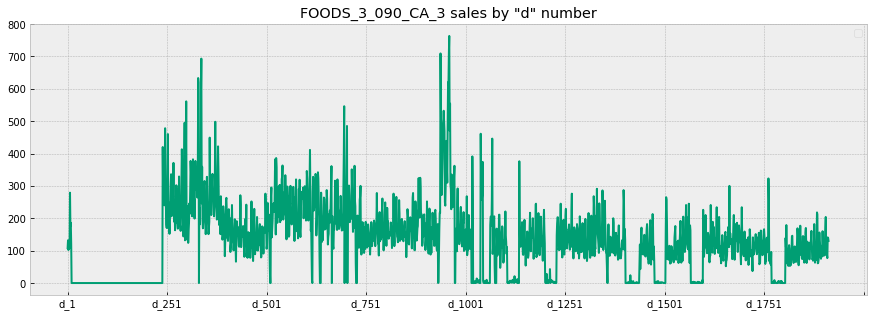

In [24]:
# product FOODS(Cat)_ 3(Dept)_090(item)_CA_(State)_3(Store)
target_cols = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'].set_index('id')[d_cols]
target_cols = target_cols.T
target_cols.plot(
    figsize=(15, 5),
    title='FOODS_3_090_CA_3 sales by "d" number',
    color=next(color_cycle)
)
plt.legend('')
plt.savefig(f"{IMG_FOLDER}/FOODS_3_090_SALE_AMOUNT.jpg")
plt.show()

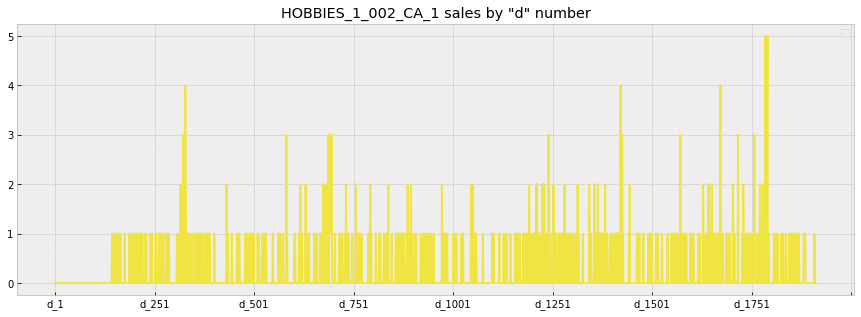

In [25]:
# product HOBBIES 1 002 CA

target_2_cols = stv.loc[stv['id'] == 'HOBBIES_1_002_CA_1_validation'].set_index('id')[d_cols]
target_2_cols = target_2_cols.T
target_2_cols.plot(
    figsize=(15, 5),
    title='HOBBIES_1_002_CA_1 sales by "d" number',
    color=next(color_cycle)
)
plt.legend('')
plt.savefig(f"{IMG_FOLDER}/HOBBIES_1_002_SALE_AMOUNT.jpg")
plt.show()

In [11]:
# Get item: FOODS_3_090_CA_3_validation, each row is a date purchase infomation
# 1. surpose d_1 = 2011-01-29
# 2. merge calendar and purchase infomation
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'].set_index("id")[d_cols].T
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(cal, how='left', validate='1:1')
example = example.set_index('date')
example.head()


,d,FOODS_3_090_CA_3_validation,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,
2011-01-29,d_1,108,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,d_2,132,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,d_3,102,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,d_4,120,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,d_5,106,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [26]:

# example['FOODS_3_090_CA_3_validation'].plot(
#     figsize=(15, 5),
#     color=next(color_cycle),
#     title='FOODS_3_090_CA_3 sales by actual sale dates'
# )

# plt.savefig(f"{IMG_FOLDER}/HOBBIES_1_002_SALE_AMOUNT.jpg")
# plt.show()

## visualize with other commodity

In [13]:

# Select more top selling examples
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'].set_index("id")[d_cols].T
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(cal, how='left', validate='1:1')

example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'].set_index("id")[d_cols].T
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(cal, how='left', validate='1:1')

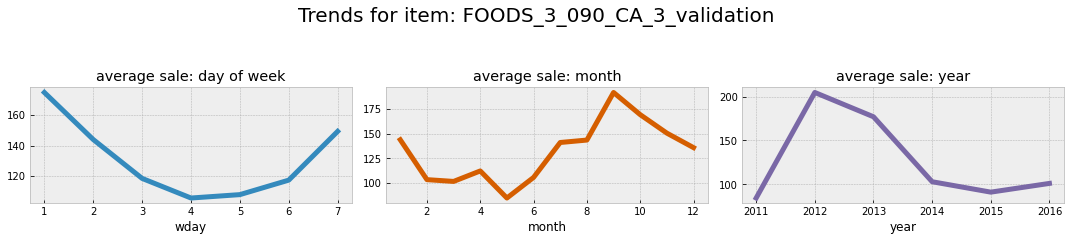

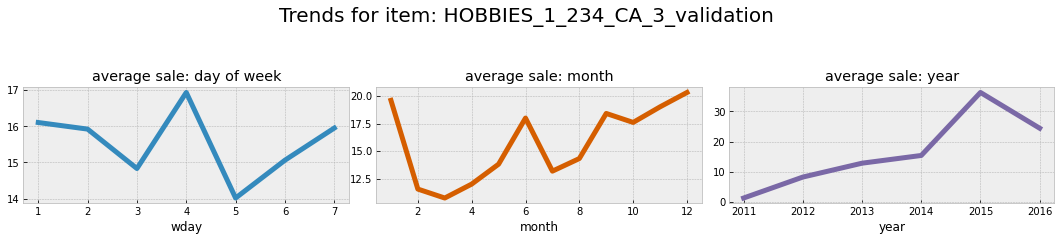

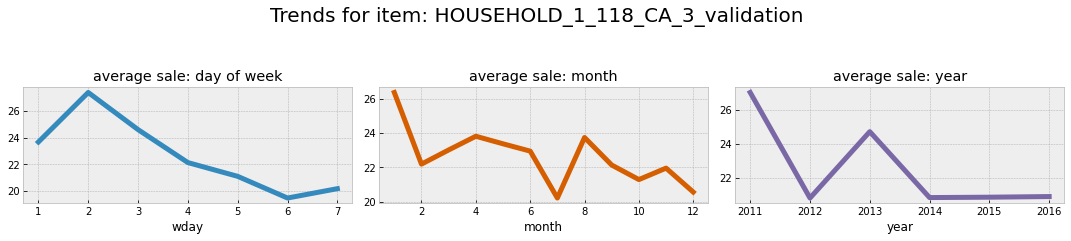

In [27]:
examples = ['FOODS_3_090_CA_3_validation','HOBBIES_1_234_CA_3_validation','HOUSEHOLD_1_118_CA_3_validation']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    
    plt.savefig(f"{IMG_FOLDER}/Trend_{examples[i]}.jpg")
    plt.show()

## Random sample items

In [15]:
# cal.set_index("d").head()

In [16]:
# stv.set_index("id")[d_cols].T.head()

In [17]:
twenty_examples = stv.sample(20, random_state=529).set_index('id')[d_cols].T
twenty_examples = twenty_examples.merge(
    cal.set_index('d')['date'],
    left_index=True,
    right_index=True,
    validate='1:1'
).set_index('date')

twenty_examples.head()

,FOODS_1_013_TX_1_validation,HOUSEHOLD_1_311_WI_1_validation,FOODS_3_805_CA_3_validation,HOUSEHOLD_2_369_TX_2_validation,HOUSEHOLD_1_080_TX_2_validation,HOUSEHOLD_1_463_CA_2_validation,FOODS_2_046_CA_1_validation,HOUSEHOLD_2_102_WI_3_validation,FOODS_2_131_TX_2_validation,HOUSEHOLD_2_115_WI_1_validation,HOUSEHOLD_1_192_CA_3_validation,FOODS_3_641_CA_1_validation,FOODS_2_110_WI_2_validation,HOUSEHOLD_2_060_TX_2_validation,FOODS_3_018_CA_3_validation,FOODS_1_137_WI_2_validation,FOODS_3_667_CA_2_validation,FOODS_2_162_WI_1_validation,HOBBIES_2_142_TX_2_validation,FOODS_1_053_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,1,0
2011-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
2011-01-31,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,6,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,5,0
2011-02-02,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,6,0


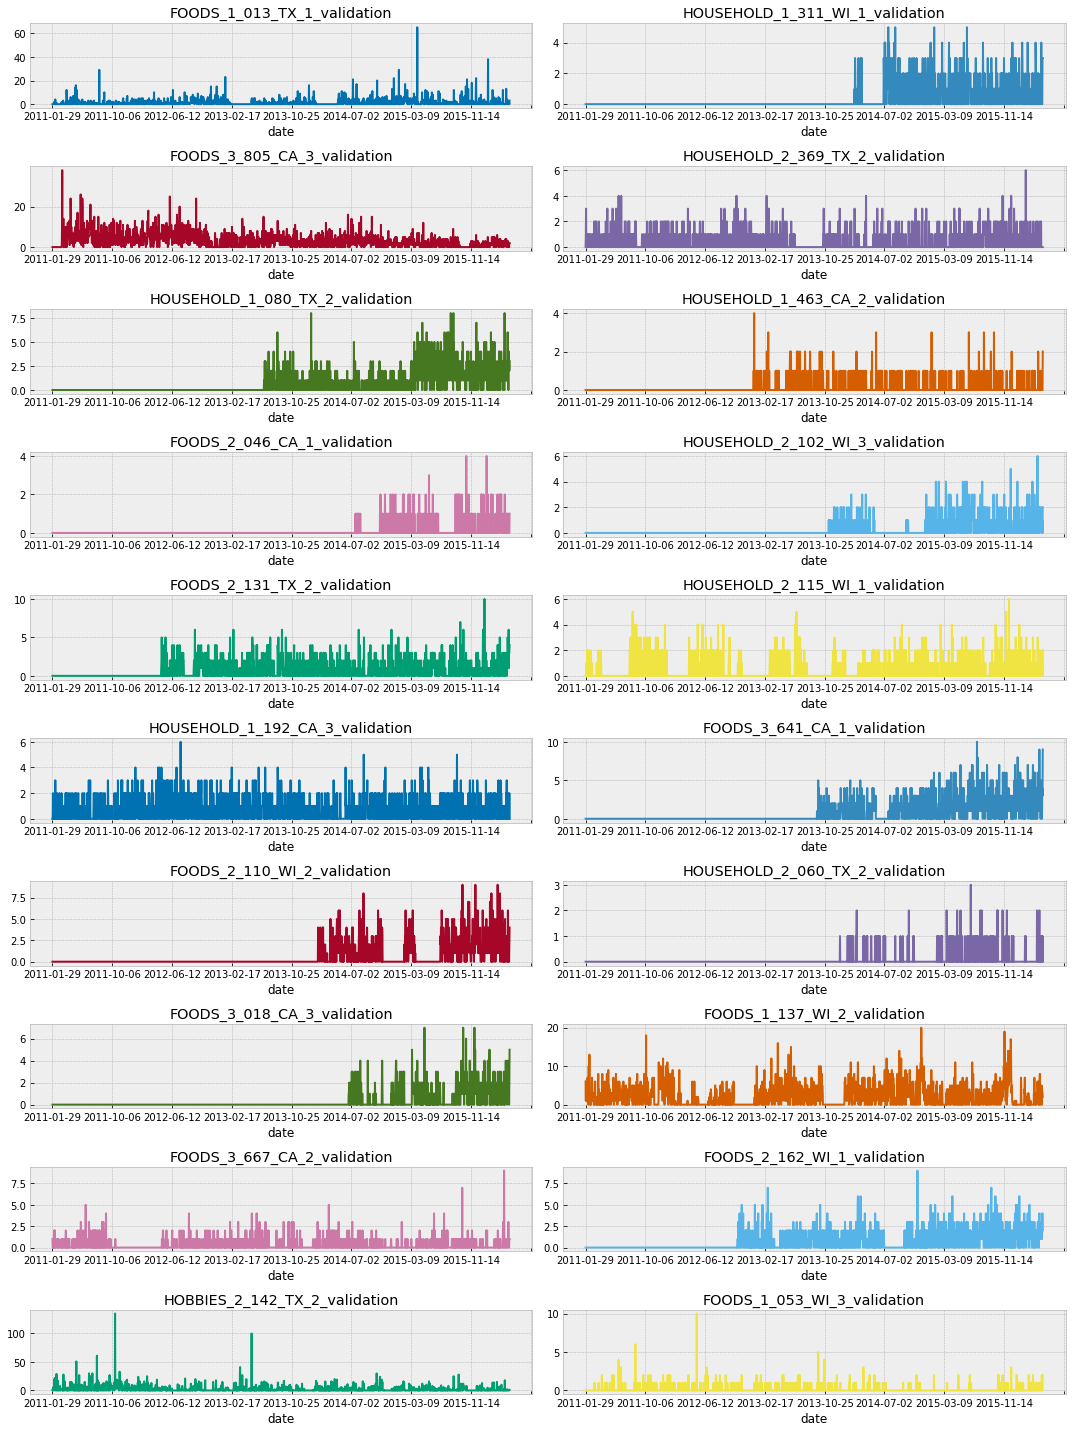

In [28]:
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(
        title=item,
        color=next(color_cycle),
        ax=axs[ax_idx]
    )
    ax_idx += 1
plt.tight_layout()
plt.savefig(f"{IMG_FOLDER}/Trend_Random_Sample_Twenty.jpg")
plt.show()

## Plot Items with same cat_id

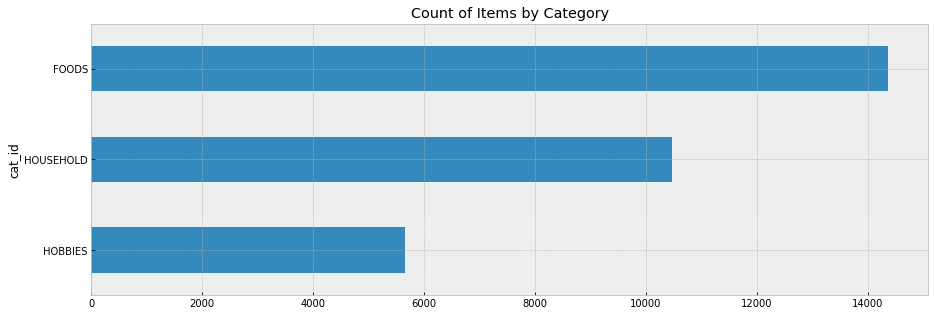

In [29]:
# item number: in different x(Dept)_y(item)_z_(State)_w(Store)
stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')

plt.savefig(f"{IMG_FOLDER}/Amount_of_items_by_category.jpg")
plt.show()

In [31]:
past_sales = stv.set_index('id')[d_cols].T \
    .merge(
        cal.set_index('d')['date'],
        left_index=True,
        right_index=True,
        validate='1:1'
    ).set_index('date')

past_sales.head()


,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,...,FOODS_3_803_WI_3_validation,FOODS_3_804_WI_3_validation,FOODS_3_805_WI_3_validation,FOODS_3_806_WI_3_validation,FOODS_3_807_WI_3_validation,FOODS_3_808_WI_3_validation,FOODS_3_809_WI_3_validation,FOODS_3_810_WI_3_validation,FOODS_3_811_WI_3_validation,FOODS_3_812_WI_3_validation,FOODS_3_813_WI_3_validation,FOODS_3_814_WI_3_validation,FOODS_3_815_WI_3_validation,FOODS_3_816_WI_3_validation,FOODS_3_817_WI_3_validation,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,...,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,...,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,...,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,...,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0


In [32]:
len(past_sales.index) # days

1913

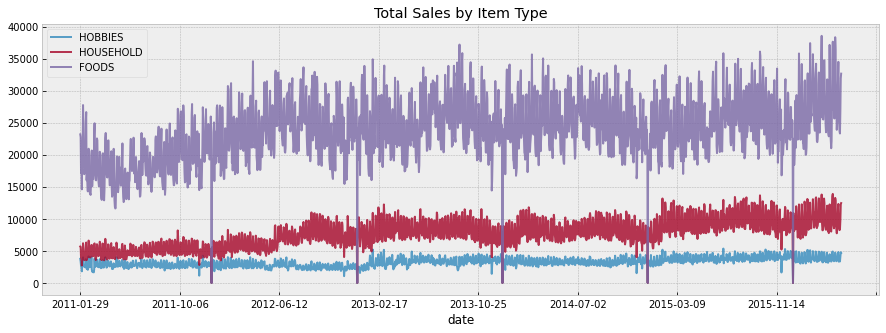

In [33]:
# 統合同一類型的商品銷售數量
for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c] # same cat_id items
    past_sales[items_col].sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.savefig(f"{IMG_FOLDER}/Total_sales_by_item_type.jpg")
plt.show()

# 食品與家用品類的銷售數量皆有提升，HOBBIES相對持平

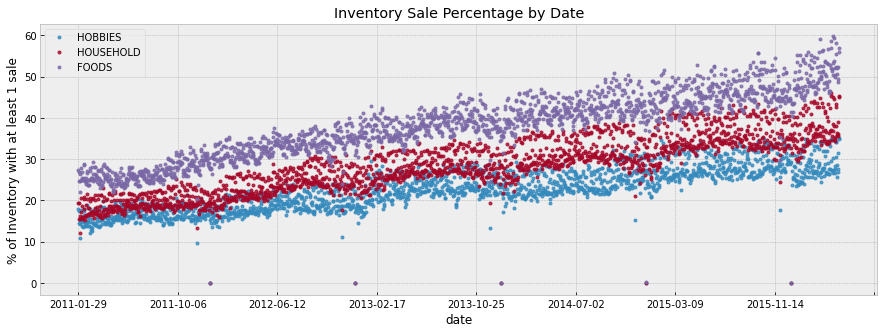

In [142]:
# 每間店依照分類, 平均每一天未售出商品項目的比例
past_sales_clipped = past_sales.clip(0, 1)
for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    (past_sales_clipped[items_col].mean(axis=1) * 100) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Inventory Sale Percentage by Date',
              style='.')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(stv['cat_id'].unique())
plt.savefig(f"{IMG_FOLDER}/Inventory_sale_percentage_by_date.jpg")
plt.show()


# 隨時間來看，商品銷售項目趨於集中（可能是類型變多，舊商品停售），特別是食物類

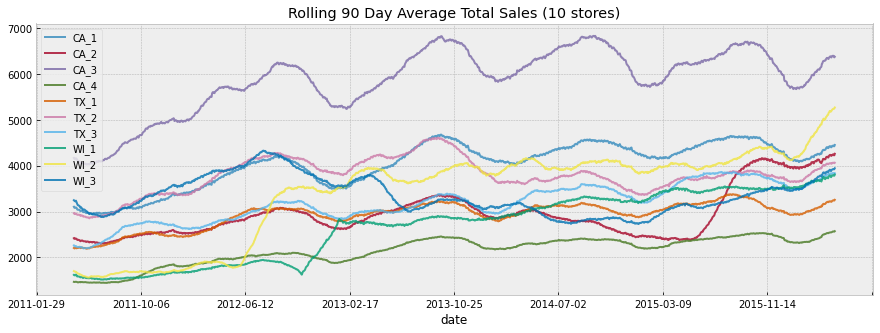

In [34]:
# 分店商品銷售量，90天rolling平均

store_list = sellp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)

plt.savefig(f"{IMG_FOLDER}/rolling_90_Day.jpg")
plt.show()

# WI_2 有明顯的銷售量提升，可能是新分店

# submission

In [161]:
x = stv.set_index('id')[d_cols[-30:]].mean(axis=1) #後30日的平均
x

id
HOBBIES_1_001_CA_1_validation    0.966667
HOBBIES_1_002_CA_1_validation    0.133333
HOBBIES_1_003_CA_1_validation    0.566667
HOBBIES_1_004_CA_1_validation    2.100000
HOBBIES_1_005_CA_1_validation    1.266667
                                   ...   
FOODS_3_823_WI_3_validation      0.200000
FOODS_3_824_WI_3_validation      0.300000
FOODS_3_825_WI_3_validation      0.866667
FOODS_3_826_WI_3_validation      1.066667
FOODS_3_827_WI_3_validation      1.166667
Length: 30490, dtype: float64

In [167]:
ss # include evaluation/validation data: 30980 x 2

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [180]:
thirty_day_avg_map = stv.set_index('id')[d_cols[-30:]].mean(axis=1)
thirty_day_avg_map = thirty_day_avg_map.to_dict()

In [175]:
ss['id'].map(thirty_day_avg_map).fillna(0)

0        0.966667
1        0.133333
2        0.566667
3        2.100000
4        1.266667
           ...   
60975    0.000000
60976    0.000000
60977    0.000000
60978    0.000000
60979    0.000000
Name: id, Length: 60980, dtype: float64

In [176]:
fcols = [f for f in ss.columns if 'F' in f]

In [182]:
# 全部預測成前三十天平均
for f in fcols:
    ss[f] = ss['id'].map(thirty_day_avg_map).fillna(0) 
    
ss.to_csv('submission.csv', index=False)

In [186]:
ss.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
1,HOBBIES_1_002_CA_1_validation,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333
2,HOBBIES_1_003_CA_1_validation,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
3,HOBBIES_1_004_CA_1_validation,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000
4,HOBBIES_1_005_CA_1_validation,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667
